In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
import re
# import nltk

# Load data 
books = pd.read_csv('Books.csv', low_memory=False,encoding="latin-1")
ratings = pd.read_csv('Ratings.csv', low_memory=False,encoding="latin-1")
users = pd.read_csv('Users.csv', low_memory=False,encoding="latin-1")


In [3]:
display(books.shape)
display(ratings.shape)
display(users.shape)

(271360, 8)

(1149780, 3)

(278858, 3)

In [4]:
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [5]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,1,27,632,17627,7535,2,2,2


In [6]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [7]:
books.loc[118033, 'Book-Author'] = "None"
books.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'


In [8]:
books[books['Book-Author'].isna()]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [9]:
books[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [10]:
books.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books.loc[129037, 'Publisher'] = 'Bantam'


In [11]:
books['Year-Of-Publication'].unique()


array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [12]:
books[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [13]:
# on searching for these  books we came to know about its authors
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
     

In [14]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [15]:

books.loc[books.ISBN=='2070426769','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN=='2070426769','Publisher']='Gallimard'
books.loc[books.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [16]:
books.loc[books['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [17]:
# Convert 'Year-Of-Publication' to numeric, coercing errors
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')


In [18]:
books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] < 1800)]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÃÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


In [19]:
books.loc[books.ISBN=='	9643112136','Year-Of-Publication'] = 2010
books.loc[books.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [20]:
median_year = int(books.loc[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] <= 2024), 'Year-Of-Publication'].median())

# replacing NaN values with median value of Year-Of-Publication
books.loc[(books['Year-Of-Publication'] == 0) | (books['Year-Of-Publication'] > 2024), 'Year-Of-Publication'] = median_year

print(books['Year-Of-Publication'].unique())  # Check the unique values after the changes


[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 1911 1904 1949 1932 1928 1929 1927 1931 1914
 1934 1910 1933 1902 1924 1921 1900 1944 1917 1901 2010 1908 1906 1935
 1806 2021 2012 2006 1909 2008 1378 1919 1922 1897 2024]


In [21]:
books['Book-Author'].value_counts()


Book-Author
Agatha Christie            632
William Shakespeare        567
Stephen King               524
Ann M. Martin              423
Carolyn Keene              373
                          ... 
Hans-Ulrich Wehler           1
JÃÂ¶rn Kalkbrenner          1
Paul A. Lynn                 1
Arthur Bernard Williams      1
Fred Ruckdeschel             1
Name: count, Length: 102023, dtype: int64

In [22]:
books.loc[books.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [23]:
books['ISBN']=books['ISBN'].str.lower()
books['Book-Author']=books['Book-Author'].str.lower()

books[books['Book-Title']=='Emma']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1495,0451523067,Emma,jane austen,1994,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.0...,http://images.amazon.com/images/P/0451523067.0...,http://images.amazon.com/images/P/0451523067.0...
8763,055321019x,Emma,jane austen,1981,Bantam Books,http://images.amazon.com/images/P/055321019X.0...,http://images.amazon.com/images/P/055321019X.0...,http://images.amazon.com/images/P/055321019X.0...
11571,0553212737,Emma,jane austen,1984,Bantam,http://images.amazon.com/images/P/0553212737.0...,http://images.amazon.com/images/P/0553212737.0...,http://images.amazon.com/images/P/0553212737.0...
14263,0140258175,Emma,jane austen,1996,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.0...,http://images.amazon.com/images/P/0140258175.0...,http://images.amazon.com/images/P/0140258175.0...
45955,b000051wxp,Emma,jane austen,1996,Random House,http://images.amazon.com/images/P/B000051WXP.0...,http://images.amazon.com/images/P/B000051WXP.0...,http://images.amazon.com/images/P/B000051WXP.0...
53513,0760701652,Emma,jane austen,1996,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.0...,http://images.amazon.com/images/P/0760701652.0...,http://images.amazon.com/images/P/0760701652.0...
90473,2253140732,Emma,jane austen,1997,LGF,http://images.amazon.com/images/P/2253140732.0...,http://images.amazon.com/images/P/2253140732.0...,http://images.amazon.com/images/P/2253140732.0...
106616,0460010247,Emma,jane austen,1976,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.0...,http://images.amazon.com/images/P/0460010247.0...,http://images.amazon.com/images/P/0460010247.0...
133269,0553211595,Emma,jane austen,1984,Bantam,http://images.amazon.com/images/P/0553211595.0...,http://images.amazon.com/images/P/0553211595.0...,http://images.amazon.com/images/P/0553211595.0...
166404,0681218894,Emma,jane austen,1996,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.0...,http://images.amazon.com/images/P/0681218894.0...,http://images.amazon.com/images/P/0681218894.0...


In [24]:
books[books.duplicated()]                


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730x,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
11925,014062080x,The Scarlet Letter (Penguin Popular Classics),nathaniel hawthorne,1994,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
16298,097089726x,Jasper,michelle groce,2003,Novello Festival Press,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...
19266,039592720x,Interpreter of Maladies,jhumpa lahiri,1999,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...
22339,042512164x,Capital Crimes,lawrence sanders,2000,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...
...,...,...,...,...,...,...,...,...
267020,088404632x,Dianetics: The Modern Science of Mental Health,l. ron hubbard,1995,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...
269297,055215038x,The Sleeper,gillian white,2003,Corgi Books,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...
269552,037376099x,Patient Nurse (Man Of The Month) (Harlequin D...,diana palmer,1997,Silhouette,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...
270285,189481505x,I-O,simon logan,2002,Prime (OH),http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...


In [25]:
books.drop_duplicates(keep="first",inplace=True)
books.reset_index(drop=True,inplace=True)   

In [26]:
books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [27]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271047 non-null  object
 1   Book-Title           271047 non-null  object
 2   Book-Author          271047 non-null  object
 3   Year-Of-Publication  271047 non-null  int64 
 4   Publisher            271047 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


In [28]:
pd.concat([users.head(10),users.tail(10)],axis=0)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [29]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [30]:
users[users['User-ID'].duplicated()].sum()

print(users.isnull().sum()/len(users)*100)

users['Age'].describe()


User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

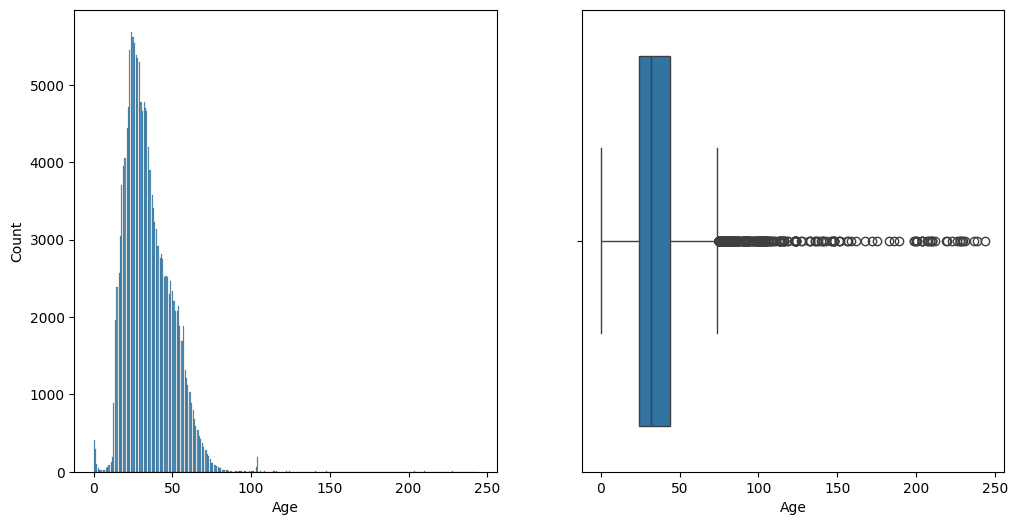

In [31]:

#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users)

In [32]:
users.loc[(users['Age']>95)|(users['Age']<4),'Age']=np.nan


In [33]:

#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users['Age'].describe()

The number of missing values is  112001


count    166857.000000
mean         34.734222
std          13.621521
min           4.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [34]:
users['Location'].nunique()


57339

In [35]:
#extracting the country names from users
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [36]:
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn wÃ¼rtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedÃ\xa0',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c',
 'ca

In [37]:
# Fixing incorrect and misspelled country names in the 'Country' column
users.loc[users['Country'].isin(['australii', 'autralia', 'western australia']), 'Country'] = 'australia'

# USA-related misspellings and variations
users.loc[users['Country'].isin([
    'unite states', '01776', '02458', '19104', '23232', '30064', '85021', '87510', 'united sates',
    'united staes', 'united state', 'united statea', 'united stated', 'america', 'united stated of america',
    'united states', 'united states of america', 'us', 'us of a', 'us virgin islands', 'usa  canada',
    'usa currently living in england', 'uusa', 'usaa', 'wonderful usa', 'california', 'orange co'
]), 'Country'] = 'usa'

# UK-related misspellings and variations
users.loc[users['Country'].isin([
    'united kindgdom', 'united kindgonm', 'united kingdom', 'u k', 'england uk', 'great britain', 'britain'
]), 'Country'] = 'uk'

# Philippines-related misspellings and variations
users.loc[users['Country'].isin([
    'the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines'
]), 'Country'] = 'philippines'

# Handling unknown or nonsensical entries
users.loc[users['Country'].isin([
    '', 'xxxxxx', 'universe', 'nowhere', 'x', 'y', 'a', 'öð¹ú', 'the', 'unknown', np.nan, 'n/a', 'aaa', 'z',
    'somewherein space', 'u', 'input error', 'none', 'country'
]), 'Country'] = 'others'

# Italy-related misspellings and variations
users.loc[users['Country'].isin(['italia', 'italien', 'itlay']), 'Country'] = 'italy'

# China-related misspellings and variations
users.loc[users['Country'].isin([' china öð¹ú', 'chinaöð¹ú', 'chian']), 'Country'] = 'china'

# Additional corrections
users['Country'] = users['Country'].replace([
    'the gambia', 'the netherlands', 'geermany', 'srilanka', 'saudia arabia', 'brasil', '_ brasil', 'indiai',
    'malaysian', 'hongkong', 'russian federation', 'holland', 'uae', 'palestine', 'north korea', 'south korea', 
    'korea', 'vatican city', 'viet nam', 'vietnam', 'swaziland', 'eswatini', 'czeck republic', 'czec republic'
], [
    'gambia', 'netherlands', 'germany', 'sri lanka', 'saudi arabia', 'brazil', 'brazil', 'india',
    'malaysia', 'hong kong', 'russia', 'netherlands', 'united arab emirates', 'palestine', 'north korea', 
    'south korea', 'south korea', 'vatican', 'vietnam', 'vietnam', 'eswatini', 'eswatini', 'czech republic', 'czech republic'
])

# You can add more mappings for other countries as needed



     

In [38]:
users['Country']=users['Country'].str.lower()


In [39]:
# users.drop('Location',axis=1,inplace=True)


In [40]:
users.columns


Index(['User-ID', 'Location', 'Age', 'Country'], dtype='object')

In [41]:
# Assuming 'users' is your dataframe and 'Country' is the column of interest

# Step 1: Count occurrences of each country
country_counts = users['Country'].value_counts()

# Step 2: Filter countries with less than 20 occurrences
countries_less_than_20 = country_counts[country_counts < 20].index.tolist()

# Step 3: Print the list of countries with less than 20 occurrences
print(countries_less_than_20)


['grenada', 'brunei', 'qatar', 'burma', 'barbados', 'nicaragua', 'wales', 'caribbean sea', 'jersey', 'bahrain', 'iraq', 'belarus', 'georgia', 'catalunya', 'benin', 'fiji', 'east africa', 'mozambique', 'ethiopia', 'kazakhstan', 'syria', 'euskal herria', 'guernsey', 'sudan', 'cayman islands', 'alderney', 'guyana', 'azerbaijan', 'eritrea', 'catalonia', 'armenia', 'moldova', 'cape verde', 'uganda', 'tunisia', 'la argentina', 'botswana', 'yemen', 'cameroon', 'gabon', 'monaco', 'galiza', 'tanzania', 'laos', 'cambodia', 'dominica', 'netherlands antilles', 'togo', 'burkina faso', 'rwanda', 'niger', 'angola', 'zambia', 'senegal', 'saint lucia', 'samoa', 'libya', 'kyrgyzstan', 'basque country', 'lombardia', 'congo', 'suisse', 'maricopa', 'trinidad', 'north korea', 'aruba', 'suriname', 'mongolia', 'lesotho', 'vanuatu', 'maldives', 'belgique', 'bhutan', 'macau', 'quit', 'serbia', 'holy see', 'namibia', 'kosovo', 'europe', 'lazio', 'tajikistan', 'san marino', 'guinea', 'turkmenistan', 'sardegna', '

In [42]:
ratings.head()
ratings.info()
ratings.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [43]:
rating_new = ratings[ratings['ISBN'].isin(books['ISBN'])]


In [44]:
print('Shape of ratings: {} and rating_new: {}'.format(ratings.shape, rating_new.shape))


Shape of ratings: (1149780, 3) and rating_new: (946267, 3)


In [45]:
rating_new['Book-Rating'].value_counts().reset_index()


,Book-Rating,count
0,0,593870
1,8,84338
2,10,65244
3,7,61112
4,9,55856
5,5,41563
6,6,29080
7,4,6984
8,3,4686
9,2,2183


In [46]:
rating_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]


,ISBN,Book-Rating
198922,0971880107,2502
35479,0316666343,1295
64994,0385504209,883
6706,0060928336,732
29601,0312195516,723
19489,0142001740,615
122717,0671027360,586
86206,0446672211,585
35396,0316601950,568
57133,0375727345,552


In [47]:
explicit_rating = rating_new[rating_new['Book-Rating'] != 0]
implicit_rating = rating_new[rating_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (352397, 3) and implicit rating: (593870, 3)


In [48]:
rating_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values


array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '0142001740', '0671027360', '0446672211',
       '0316601950', '0375727345'], dtype=object)

In [49]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722x', '0142001740', '067976402x',
       '0671027360', '0446672211']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,rich shapero,2004,Too Far
118,0671027360,Angels &amp; Demons,dan brown,2001,Pocket Star
305,044023722x,A Painted House,john grisham,2001,Dell Publishing Company
356,0142001740,The Secret Life of Bees,sue monk kidd,2003,Penguin Books
408,0316666343,The Lovely Bones: A Novel,alice sebold,2002,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),anita diamant,1998,Picador USA
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,billie letts,1998,Warner Books
748,0385504209,The Da Vinci Code,dan brown,2003,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,rebecca wells,1997,Perennial
1922,067976402x,Snow Falling on Cedars,david guterson,1995,Vintage Books USA


In [50]:
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]


,ISBN,Book-Rating
20218,0316666343,707
108535,0971880107,581
35668,0385504209,487
16535,0312195516,383
3785,0060928336,320
11275,0142001740,307
47634,0446672211,295
53296,0452282152,278
20166,0316601950,272
67751,0671027360,269


In [51]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,rich shapero,2004,Too Far
408,0316666343,The Lovely Bones: A Novel,alice sebold,2002,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),anita diamant,1998,Picador USA
748,0385504209,The Da Vinci Code,dan brown,2003,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,rebecca wells,1997,Perennial


In [52]:
# for the rating dataset, we are only taking the explicit rating dataset
df = pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')

In [53]:
#shape of the merged dataframe 'df'
df.shape

(352397, 10)

In [54]:
#displaying the top 3 rows of df
df = df.sort_values(by='User-ID')
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,Country
0,0002005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN,canada
44,1881320189,Goodbye to the Buttermilk Sky,julia oliver,1994,River City Pub,8,7,"timmins, ontario, canada",NaN,canada
38,1552041778,Jane Doe,r. j. kaiser,1999,Mira Books,8,5,"timmins, ontario, canada",NaN,canada


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352397 entries, 0 to 51550
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 352397 non-null  object 
 1   Book-Title           352397 non-null  object 
 2   Book-Author          352397 non-null  object 
 3   Year-Of-Publication  352397 non-null  int64  
 4   Publisher            352397 non-null  object 
 5   User-ID              352397 non-null  int64  
 6   Book-Rating          352397 non-null  int64  
 7   Location             352397 non-null  object 
 8   Age                  246297 non-null  float64
 9   Country              352397 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 29.6+ MB


C:\Users\DELL\AppData\Local\Temp\ipykernel_18064\2898470272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Book-Rating',palette='Set2')


<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

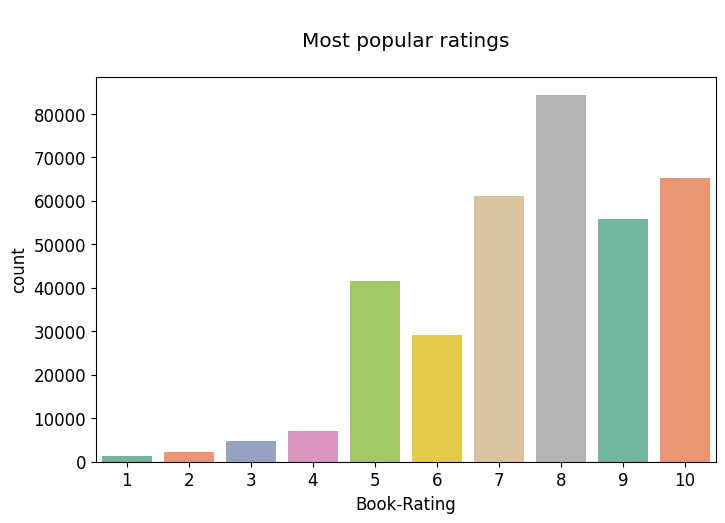

In [56]:

# most popular rating
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating',palette='Set2')
     

C:\Users\DELL\AppData\Local\Temp\ipykernel_18064\642329451.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')


<Axes: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='Book-Title'>

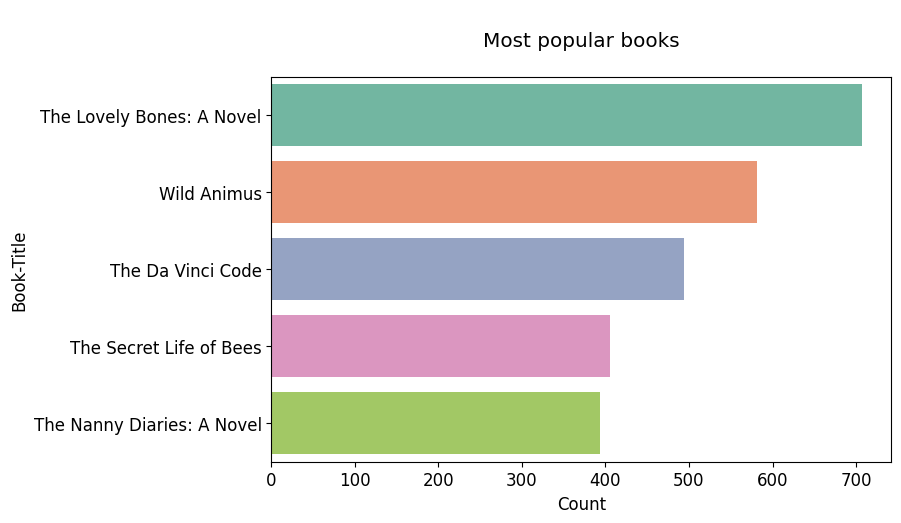

In [57]:

# top 5 most popular books

popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')
     

C:\Users\DELL\AppData\Local\Temp\ipykernel_18064\1616096459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')


<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

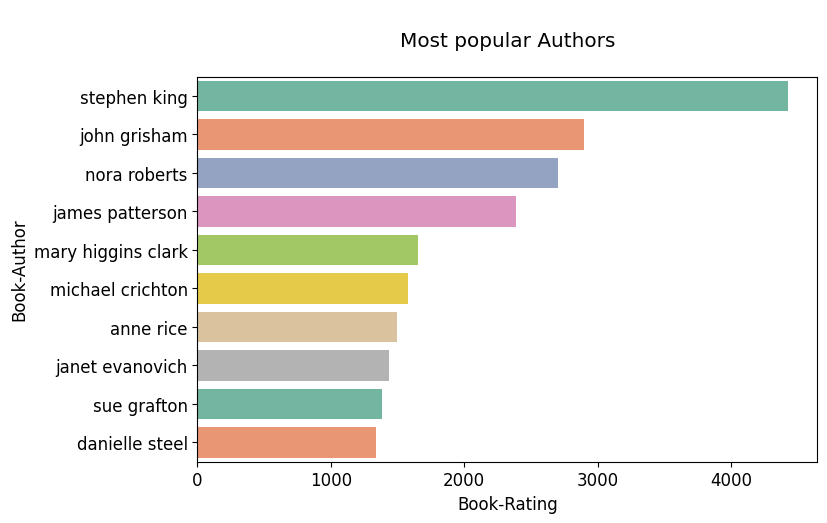

In [58]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

C:\Users\DELL\AppData\Local\Temp\ipykernel_18064\268227829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')


Text(0.5, 0, 'No of users')

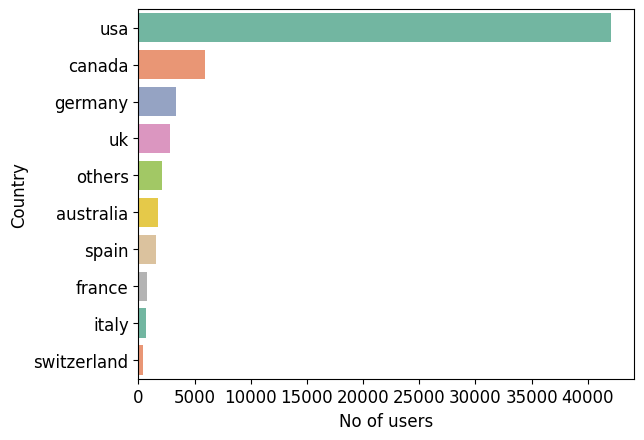

In [59]:

# countries with most readers
countries = df.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')

In [60]:
df['User-ID'].value_counts()


User-ID
11676     6354
98391     5234
189835    1713
153662    1652
23902     1082
          ... 
278759       1
278760       1
278767       1
278772       1
278710       1
Name: count, Length: 64838, dtype: int64

In [61]:
df.groupby('User-ID')['Book-Rating'].count().describe()


count    64838.000000
mean         5.435038
std         39.176711
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6354.000000
Name: Book-Rating, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_18064\4188185774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')


<Axes: xlabel='Book-Title', ylabel='Publisher'>

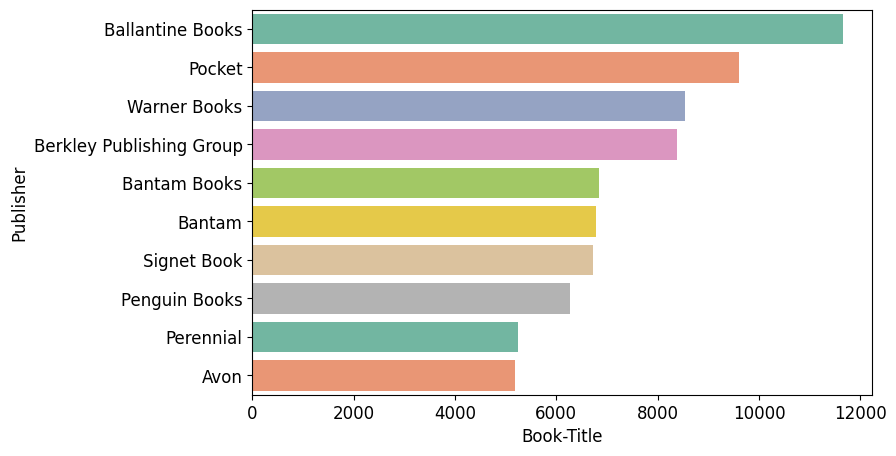

In [62]:
# Publisher with most books

publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

In [63]:
df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,Country
0,0002005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN,canada
44,1881320189,Goodbye to the Buttermilk Sky,julia oliver,1994,River City Pub,8,7,"timmins, ontario, canada",NaN,canada


In [72]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import dask.dataframe as dd


# Filter users who have rated at least 10 books
user_counts = df['User-ID'].value_counts()
df_filtered = df[df['User-ID'].isin(user_counts[user_counts >= 5].index)]

# Filter books that have been rated at least 5 times
book_counts = df['Book-Title'].value_counts()
df_filtered = df_filtered[df_filtered['Book-Title'].isin(book_counts[book_counts >= 5].index)]
df_filtered['Book-Title'] = df_filtered['Book-Title'].astype('category')

# Load your dataframe as a Dask DataFrame
dask_df = dd.from_pandas(df_filtered, npartitions=10)

# Pivot table using Dask (may take longer to process but handles larger data)
user_item_matrix = dask_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)

# Compute and then convert the resulting matrix to a sparse format
user_item_matrix = user_item_matrix.compute()  # Converts Dask DataFrame to pandas
user_item_sparse = csr_matrix(user_item_matrix.values)


MemoryError: Unable to allocate 134. MiB for an array with shape (70065945,) and data type int16

In [138]:
# Step 2: Train a KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [139]:
# Step 3: Function to Recommend Books
def recommend_books(book_title, n_recommendations=5):
    # Find the index of the book in the matrix
    book_idx = user_item_matrix.columns.get_loc(book_title)
    
    # Use KNN to find the n nearest books
    distances, indices = knn.kneighbors(user_item_sparse[:, book_idx].reshape(1, -1), n_neighbors=n_recommendations+1)
    
    # Get the recommended book titles (excluding the input book itself)
    recommended_books = [user_item_matrix.columns[i] for i in indices.flatten()[1:]]
    
    print(f"Books similar to '{book_title}':")
    for i, book in enumerate(recommended_books, 1):
        print(f"{i}: {book}")

# Example usage: Recommend 5 books similar to "Clara Callan"
recommend_books("Clara Callan", n_recommendations=5)

ValueError: X has 6217 features, but NearestNeighbors is expecting 87887 features as input.